**Nur Imam Masri**

**Email : nurimammasri.01@gmail.com**

**Username : imammasri**

***Submission Machine Learning Pemula Dicoding***

In [ ]:
# import library
import numpy as np
import os
import zipfile
import shutil

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# import library Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

In [ ]:
# zip file download rockpaperscissors.zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-11 11:11:13--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.99MB/s    in 41s     

2021-04-11 11:11:56 (7.44 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# unzipping/extract data .zip
file_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

listdir_image = os.listdir('/tmp/rockpaperscissors')
print(listdir_image)

['scissors', 'rock', 'README_rpc-cv-images.txt', 'rps-cv-images', 'paper']


In [ ]:
# check a lot of data for paper, rock and scissors
dir_image = '/tmp/rockpaperscissors/'
rock_dir = os.path.join(dir_image,'rock')
paper_dir = os.path.join(dir_image, 'paper')
scissors_dir = os.path.join(dir_image, 'scissors')
print(len(os.listdir(paper_dir)))
print(len(os.listdir(rock_dir))) 
print(len(os.listdir(scissors_dir)))

712
726
750


In [ ]:
# delete dir that is not used
import shutil

list_category = ['rock', 'paper', 'scissors']

for x in listdir_image:
  if x not in list_category:
    path = os.path.join(dir_image, x)
    if os.path.isfile(path):
        os.remove(path)
    elif os.path.isdir(path):
        shutil.rmtree(path)
    else:
        print("Unknown or already remove!")

listdir_image = os.listdir('/tmp/rockpaperscissors')
listdir_image

['scissors', 'rock', 'paper']

In [ ]:
# check image on paper, rock, scissors
from PIL import Image
total = 0

for x in list_category:
  dir = os.path.join(dir_image, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir)
  for i in range(len(img_name)):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)
    
    if size == img.size:
      continue
    else :
      size = img.size
      print('-',img.size)
  print('---------------')

print('\nTotal :', total)

rock: 726
- (300, 200)
---------------
paper: 712
- (300, 200)
---------------
scissors: 750
- (300, 200)
---------------

Total : 2188


In [ ]:
# check file images in directory
paper_images = os.listdir(paper_dir)
rock_images = os.listdir(rock_dir)
scissors_images = os.listdir(scissors_dir)

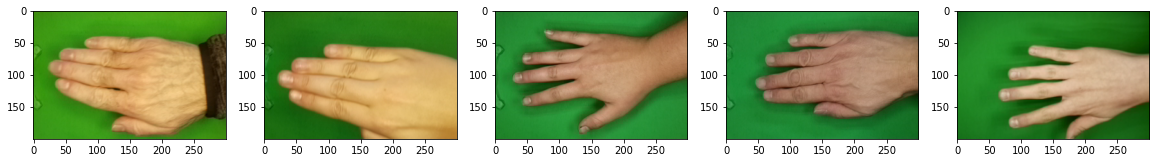

In [ ]:
# check images paper
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(paper_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(paper_dir, img_path))
    plt.imshow(img)
plt.show()

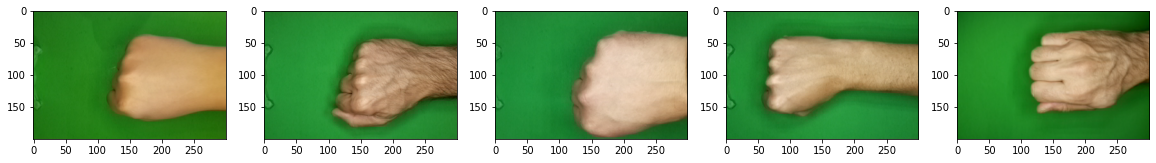

In [ ]:
# check images rock
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(rock_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(rock_dir, img_path))
    plt.imshow(img)
plt.show()

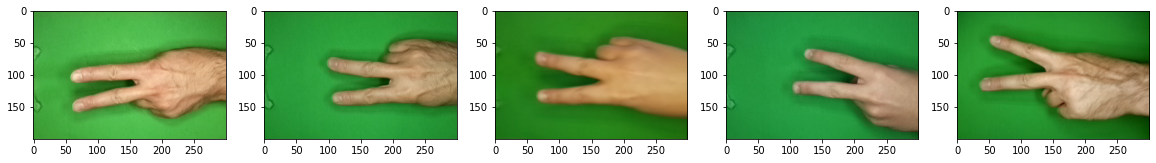

In [ ]:
# check images scissors
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(scissors_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(scissors_dir, img_path))
    plt.imshow(img)
plt.show()

In [ ]:
# make imagedatagenerator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.4,
    fill_mode = 'nearest',
    validation_split=0.2   
)

We can specify val_dataagen alone like

```
val_datagen = ImageDataGenerator(
        # YOUR CODE HERE
        rescale=1 / 255.,
        validation_split=0.2
    )
```

In [ ]:
train_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size =(100,100),
    batch_size = 32,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size = (100,100),
    batch_size = 32,
    class_mode = 'categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
validation_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
# make model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(100, 100, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
# from tensorflow.keras.layers import Input
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications import ResNet152V2
# model = tf.keras.models.Sequential([
#     ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(100, 100, 3))),
#     # tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Flatten(), 
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(3, activation='softmax')  
# ])
# model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       3

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 5,
    callbacks=[callbacks],
    verbose =2
)

Epoch 1/50
25/25 - 17s - loss: 1.3411 - accuracy: 0.3988 - val_loss: 1.0762 - val_accuracy: 0.4062
Epoch 2/50
25/25 - 14s - loss: 1.0358 - accuracy: 0.4880 - val_loss: 0.8838 - val_accuracy: 0.6687
Epoch 3/50
25/25 - 15s - loss: 0.8019 - accuracy: 0.6800 - val_loss: 0.7112 - val_accuracy: 0.6750
Epoch 4/50
25/25 - 14s - loss: 0.4770 - accuracy: 0.8281 - val_loss: 0.4759 - val_accuracy: 0.8000
Epoch 5/50
25/25 - 14s - loss: 0.3381 - accuracy: 0.8723 - val_loss: 0.5557 - val_accuracy: 0.8000
Epoch 6/50
25/25 - 15s - loss: 0.2602 - accuracy: 0.9050 - val_loss: 0.2775 - val_accuracy: 0.8750
Epoch 7/50
25/25 - 14s - loss: 0.2296 - accuracy: 0.9343 - val_loss: 0.2228 - val_accuracy: 0.9187
Epoch 8/50
25/25 - 15s - loss: 0.2187 - accuracy: 0.9287 - val_loss: 0.1949 - val_accuracy: 0.9187
Epoch 9/50
25/25 - 15s - loss: 0.2236 - accuracy: 0.9150 - val_loss: 0.1599 - val_accuracy: 0.9625
Epoch 10/50
25/25 - 15s - loss: 0.2029 - accuracy: 0.9312 - val_loss: 0.2087 - val_accuracy: 0.9312
Epoch 11/

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

14/14 [==============================] - 3s 234ms/step - loss: 0.0460 - accuracy: 0.9794
Accuracy (train):  0.9931467771530151
Accuracy: (test) 0.9794050455093384


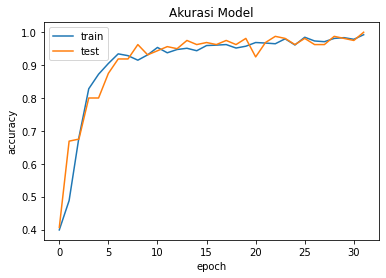

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

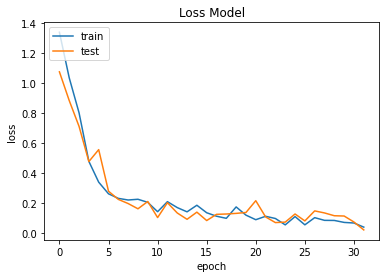

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving WhatsApp Image 2021-04-11 at 16.45.41.jpeg to WhatsApp Image 2021-04-11 at 16.45.41 (1).jpeg
Scissors


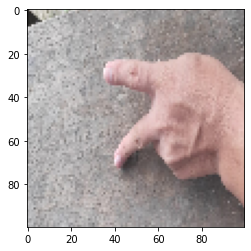

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  if classes[0,0] == 1.0:
    print('Paper')
  elif classes[0,1] == 1.0:
    print('Rock')
  else:
    print('Scissors')

Safe Model to TF Lite

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpb0br2m3t/assets


In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.pb') 
%cd

INFO:tensorflow:Assets written to: my_model.pb/assets


INFO:tensorflow:Assets written to: my_model.pb/assets


/root
